# Fast Food Data 01
Number of Fast Food Restaurants and its relation to obesity

**Author:** Ioakeim Ioakeim

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**File Paths**

In [5]:
path_input = '00_data_input'
path_atlas = os.path.join(path_input, 'food_atlas.xls')
path_inter = '02_data_intermediate'
path_fast_food = os.path.join(path_inter, 'fast_food_refined_data.csv')
path_obesity = os.path.join(path_inter, 'obesity_refined_data.csv')



**Read Files and extract relevant information/columns**

In [6]:

df_restaurants = pd.read_excel(path_atlas, sheet_name='RESTAURANTS')
df_fast_food = df_restaurants[['FIPS', 'FFR09', 'FFR14', 'PCH_FFR_09_14','FFRPTH09','FFRPTH14','PCH_FFRPTH_09_14' ]].copy()
print('{:<25} {:d}'.format('Number of entries:', len(df_fast_food.index)))
df_fast_food[:5]


Number of entries:        3143


,FIPS,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14
0,1001,30,36,20.000000,0.554170,0.649878,17.270512
1,1003,112,132,17.857143,0.624282,0.659634,5.662750
2,1005,21,22,4.761905,0.759301,0.818239,7.762116
3,1007,7,5,-28.571429,0.305131,0.222163,-27.190844
4,1009,24,21,-12.500000,0.418549,0.363832,-13.073035


**Check for incomplete/missing Data**

In [7]:
#Number of Entries excluding null values
df_fast_food_without_nan = df_fast_food.dropna()
print('{:<25} {:d}'.format('Number of entries:', len(df_fast_food_without_nan.index)))


Number of entries:        3092


**Rename Columns for better readability**

In [8]:
#CPT = count per thousand | PCT = percentage
df_fast_food.rename(columns={'FIPS':'county_fips','FFR09':'fast_food_count_2009', \
                           'FFR14':'fast_food_count_2014', 'PCH_FFR_09_14': 'PCT_change_fast_food_count', 'FFRPTH09':'CPT_fast_food_2009', 'FFRPTH14':'CPT_fast_food_2014','PCH_FFRPTH_09_14': 'PCT_change_fast_food'}, inplace=True)

In [9]:
df_fast_food[:3]

,county_fips,fast_food_count_2009,fast_food_count_2014,PCT_change_fast_food_count,CPT_fast_food_2009,CPT_fast_food_2014,PCT_change_fast_food
0,1001,30,36,20.000000,0.554170,0.649878,17.270512
1,1003,112,132,17.857143,0.624282,0.659634,5.662750
2,1005,21,22,4.761905,0.759301,0.818239,7.762116


In [10]:
#extract/save modified data
df_fast_food.to_csv(path_fast_food, index=False)

In [11]:
#pd.read_csv(path_fast_food)

### Plotting: CPT of Fast food Restaurants per County

In [12]:
def plot_distribution(title, series, lower_limit, upper_limit, bin_precision, y_limit, color):
    bins = np.linspace(lower_limit, upper_limit, ((upper_limit - lower_limit) / bin_precision) + 1)
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    plt.xlim(lower_limit, upper_limit)
    plt.ylim(0, y_limit)
    sns.distplot(series.dropna(), bins=bins, color=color, kde=False) 

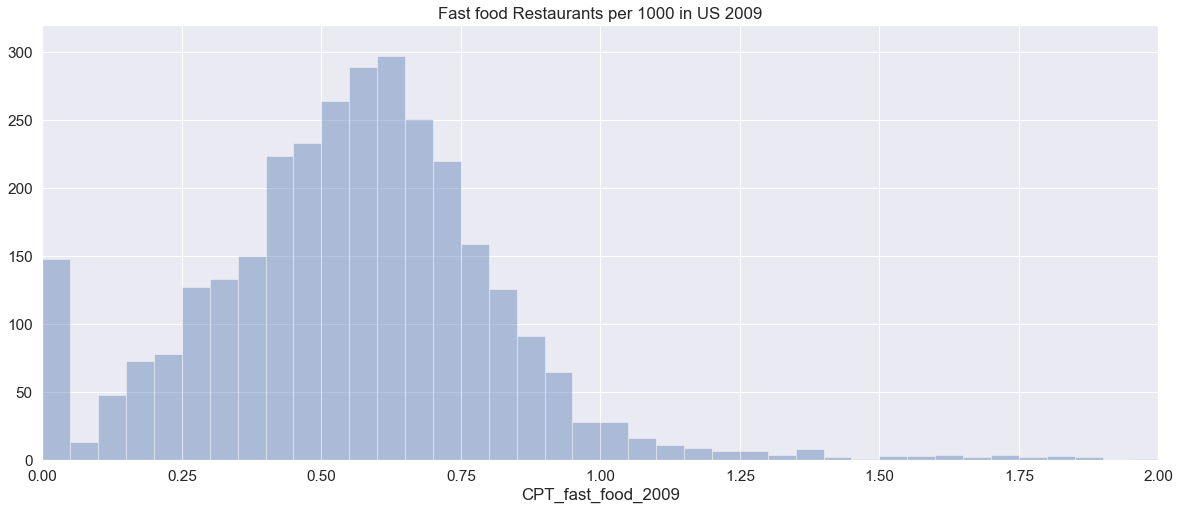

In [13]:
plot_distribution('Fast food Restaurants per 1000 in US 2009', df_fast_food['CPT_fast_food_2009'], 0,2,0.05,320, 'b')

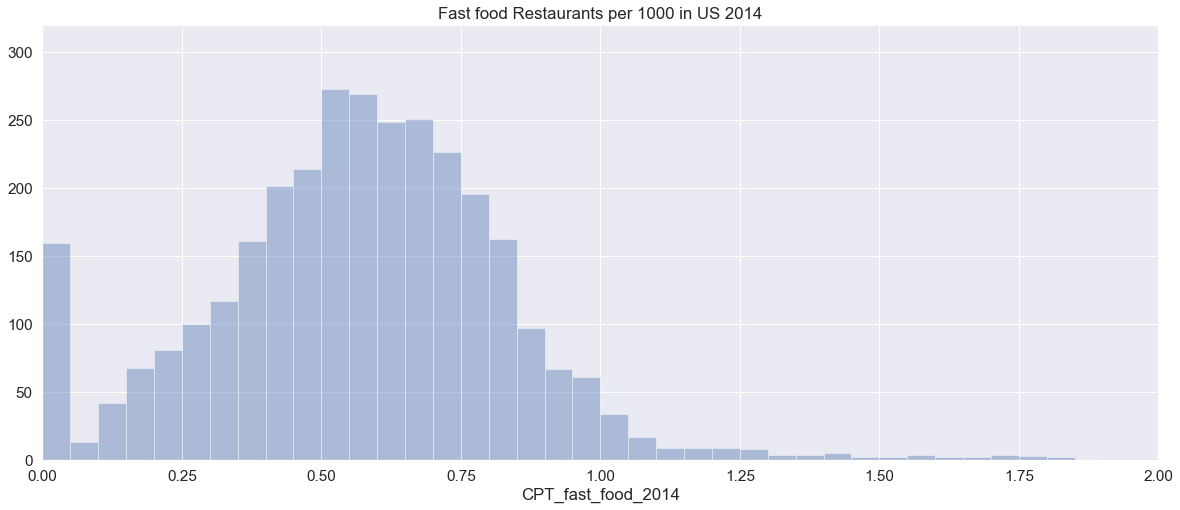

In [14]:
plot_distribution('Fast food Restaurants per 1000 in US 2014', df_fast_food['CPT_fast_food_2014'], 0,2,0.05,320, 'b')

**Obesity comes into Play**

In [15]:
df_obesity = pd.read_csv(path_obesity)
df_fast_food = pd.read_csv(path_fast_food)

In [16]:
df_obese_fast_food = df_obesity[['county_fips','PCT_obese_adults_2013']]
df_obese_fast_food = df_obese_fast_food.merge(df_fast_food[['county_fips','CPT_fast_food_2014']], how='inner', on='county_fips')
df_obese_fast_food[:4]

,county_fips,PCT_obese_adults_2013,CPT_fast_food_2014
0,1001,34.1,0.649878
1,1003,27.4,0.659634
2,1005,44.4,0.818239
3,1007,40.3,0.222163


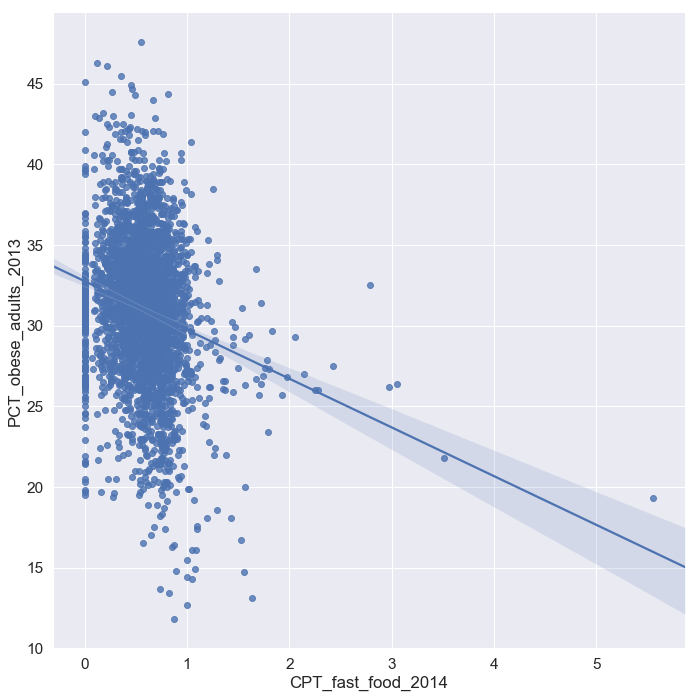

In [17]:
sns.lmplot(x='CPT_fast_food_2014', y='PCT_obese_adults_2013', data=df_obese_fast_food, size=10)

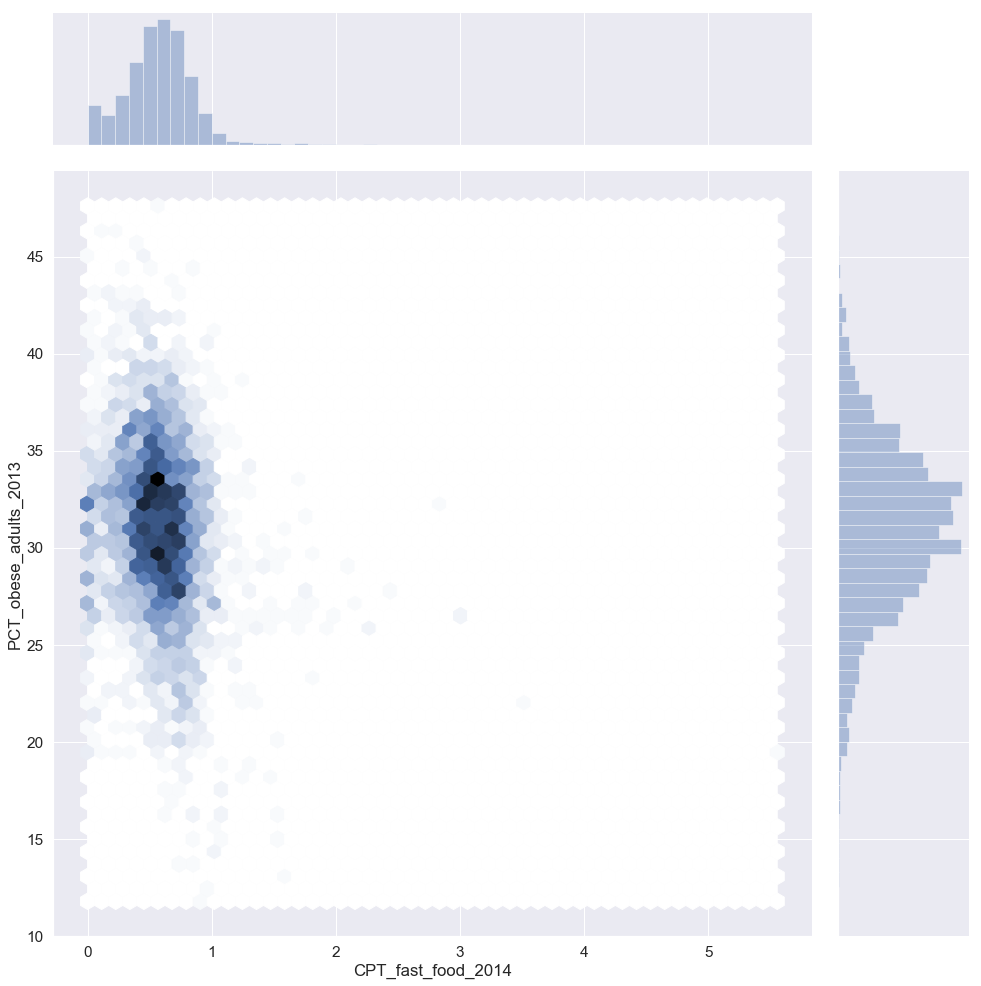

In [18]:
sns.jointplot(x='CPT_fast_food_2014', y='PCT_obese_adults_2013', data=df_obese_fast_food, kind='hex', size=14)